C:\Users\BC\AppData\Local\Temp\ipykernel_21488\1068510869.py:4: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("sales.csv")
C:\Users\BC\AppData\Local\Temp\ipykernel_21488\1068510869.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['Date'])
C:\Users\BC\AppData\Local\Temp\ipykernel_21488\1068510869.py:14: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Pct_Change'] = df['Amount'].pct_change() * 100


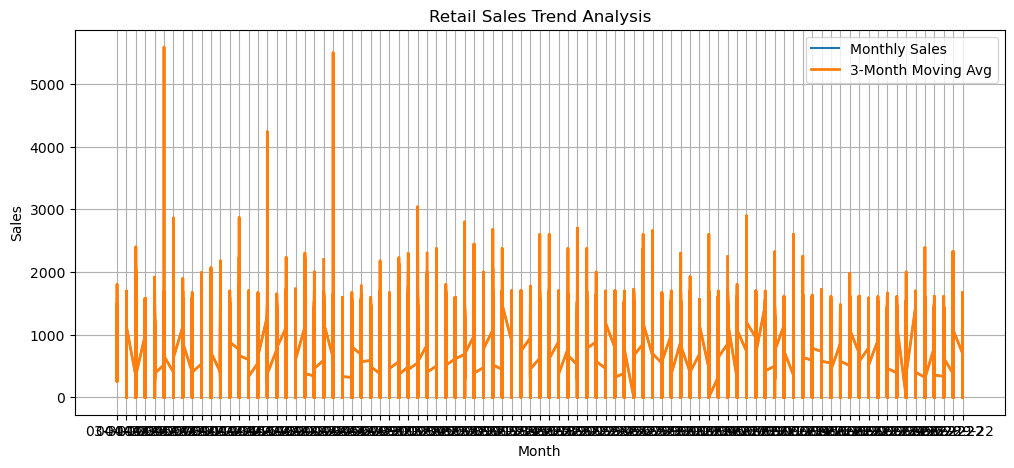

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
#load the file 
df= pd.read_csv("sales.csv")
#print(df)
#print(df.columns)
#datetime format 
df['date'] = pd.to_datetime(df['Date'])
#sorting according to dates
df = df.sort_values('Date')
#trend calculation. moving average 
df['MA_3'] = df['Amount'].rolling(window=3).mean()
#percentage change
df['Pct_Change'] = df['Amount'].pct_change() * 100
#plot
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Amount'], label='Monthly Sales')
# 3-month moving average line
plt.plot(df['Date'], df['Amount'], label='3-Month Moving Avg', linewidth=2)
plt.legend()
plt.title("Retail Sales Trend Analysis")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


In [3]:
import pandas as pd
df=pd.read_csv("Loan.csv")
print(df.head())
print(df.columns)
#covert loan status to numerical column
df['default_flag'] = df['loan_status'].apply(lambda x: 1 if x == "COLLECTION" else 0)
#Calculate Probability of Default
# --------------------------------------------------------
prob_default = df['default_flag'].mean()
print("Probability of Default:", prob_default)
# 4. Expected Loss per Customer:
#    E(X) = p(default) * loan amount
# --------------------------------------------------------
df['Expected_Loss'] = prob_default * df['Principal']
# 5. Total Expected Loss for Entire Portfolio
# --------------------------------------------------------
total_expected_loss = df['Expected_Loss'].sum()
print("Total Expected Loss:", total_expected_loss)
# 6. Average Expected Loss per Loan (Optional)
# --------------------------------------------------------
average_expected_loss = df['Expected_Loss'].mean()
print("Average Expected Loss per Loan:", average_expected_loss)

       Loan_ID loan_status  Principal  terms effective_date   due_date  \
0  xqd20166231     PAIDOFF       1000     30       9/8/2016  10/7/2016   
1  xqd20168902     PAIDOFF       1000     30       9/8/2016  10/7/2016   
2  xqd20160003     PAIDOFF       1000     30       9/8/2016  10/7/2016   
3  xqd20160004     PAIDOFF       1000     15       9/8/2016  9/22/2016   
4  xqd20160005     PAIDOFF       1000     30       9/9/2016  10/8/2016   

     paid_off_time  past_due_days  age             education  Gender  
0  9/14/2016 19:31            NaN   45  High School or Below    male  
1   10/7/2016 9:00            NaN   50              Bechalor  female  
2  9/25/2016 16:58            NaN   33              Bechalor  female  
3  9/22/2016 20:00            NaN   27               college    male  
4  9/23/2016 21:36            NaN   28               college  female  
Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'ag

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')
               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


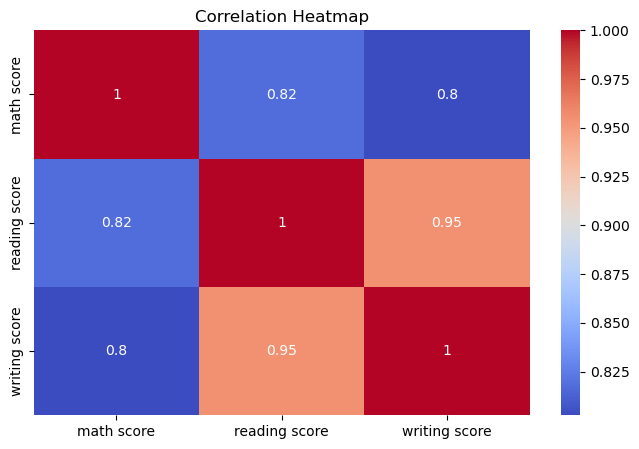

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Students.csv")
print(df.columns)
# 2. SELECT IMPORTANT COLUMNS
data = df[['math score', 'reading score', 'writing score']]
# 3. CALCULATE CORRELATION
corr = data.corr()
print(corr)
# 4. PLOT HEATMAP
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [6]:
import pandas as pd
from scipy import stats
df = pd.read_csv("weight.csv")
df['Height_cm'] = df['Height'] * 2.54
# Null hypothesis H0: mean height = 170
# Alternative H1: mean height ≠ 170

t_stat, p_value = stats.ttest_1samp(df['Height_cm'], 170)
print("One-sample t statistic:", t_stat)
print("One-sample p-value:", p_value)
male_heights = df[df['Gender'] == 'Male']['Height_cm']
female_heights = df[df['Gender'] == 'Female']['Height_cm']
t_stat2, p_value2 = stats.ttest_ind(male_heights, female_heights, equal_var=False)
print("Two-sample t statistic:", t_stat2)
print("Two-sample p-value:", p_value2)



One-sample t statistic: -14.59571147549157
One-sample p-value: 9.252468503708884e-48
Two-sample t statistic: 95.60271449148864
Two-sample p-value: 0.0


Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')
Regression Line: Price = 117841.63757442185 * Rooms + 408619.81940216455
R² Score: 0.11267062525400562


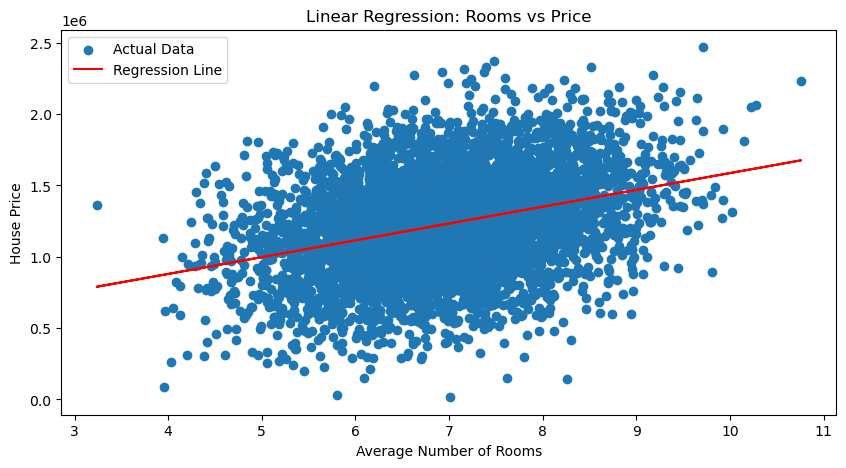

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
df = pd.read_csv("Housing.csv")
print(df.columns)
X = df[['Avg. Area Number of Rooms']]   # Feature (independent variable)
y = df['Price']                          # Target (dependent variable)
model = LinearRegression()
model.fit(X, y)
# 4. MAKE PREDICTIONS
y_pred = model.predict(X)
# 5. EXTRACT COEFFICIENT & INTERCEPT
slope = model.coef_[0]       # regression coefficient
intercept = model.intercept_ # regression intercept

print("Regression Line: Price =", slope, "* Rooms +", intercept)
# 6. R-SQUARED SCORE
r2 = r2_score(y, y_pred)
print("R² Score:", r2)
# 7. SCATTER PLOT + REGRESSION LINE
plt.figure(figsize=(10,5))
plt.scatter(X, y, label="Actual Data")
plt.plot(X, y_pred, color='red', label="Regression Line")
plt.xlabel("Average Number of Rooms")
plt.ylabel("House Price")
plt.title("Linear Regression: Rooms vs Price")
plt.legend()
plt.show()













In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
df=pd.read_csv("insurance.csv")
print(df.columns)
# 2. HANDLE VARIABLES
df = pd.get_dummies(df, columns=['smoker', 'region'], drop_first=True)
# 3. SELECT FEATURES AND TARGET
X = df[['age', 'bmi', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']]
y = df['charges']
# 4. TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 5. BUILD THE MODEL
model = LinearRegression()
model.fit(X_train, y_train)
# 7. CALCULATE RMSE AND R2 SCORE
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R² Score:", r2)
# 8. PRINT COEFFICIENTS
coef = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coef)



Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
RMSE: 5843.199975602575
R² Score: 0.7800755882073591
                   Coefficient
age                 259.260747
bmi                 336.568823
smoker_yes        23673.551372
region_northwest   -336.848253
region_southeast   -673.775453
region_southwest   -808.159352


In [6]:
# 1. IMPORT LIBRARIES
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

# 2. LOAD DATA
df = pd.read_csv("heart.csv")
print(df.head())
print(df.columns)


# 3. SELECT FEATURES (X) AND TARGET (y)
X = df.drop("HeartDisease", axis=1)   # all predictors
y = df["HeartDisease"]               # target (0 = No, 1 = Yes)

# 4. TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. BUILD MODEL
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 6. MAKE PREDICTIONS
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]   # probability of having disease

# 7. EVALUATION METRICS
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

print("Confusion Matrix:\n", cm)
print("Accuracy:", acc)
print("ROC-AUC:", roc)

# 8. CHECK COEFFICIENTS (WHICH FEATURES INCREASE RISK)
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})
print(coefficients.sort_values(by="Coefficient", ascending=False))


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')


KeyError: "['HeartDisease'] not found in axis"

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
Confusion Matrix:
 [[23  9]
 [ 7 21]]
Accuracy: 0.7333333333333333
ROC-AUC: 0.8270089285714286


C:\Users\BC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


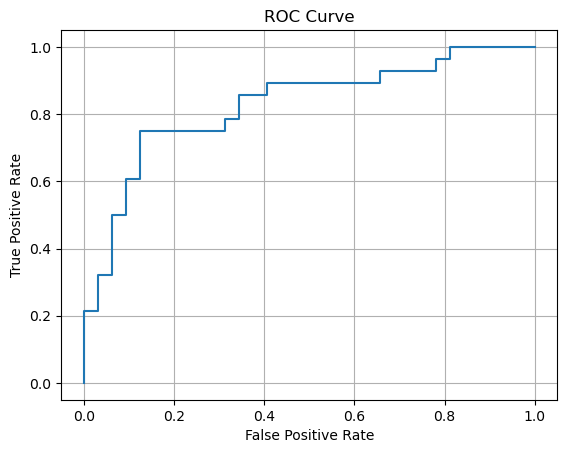

     Feature  Coefficient
1        sex     1.412626
11        ca     1.185290
12      thal     0.825782
8      exang     0.572382
9    oldpeak     0.452987
2         cp     0.287843
6    restecg     0.278393
10     slope     0.272352
3   trestbps     0.025655
4       chol     0.005407
0        age    -0.034983
7    thalach    -0.044737
5        fbs    -0.671225


In [7]:
# 1. IMPORT LIBRARIES
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 2. LOAD DATA
df = pd.read_csv("heart.csv")      # change file name if needed
print(df.head())

# 3. SELECT FEATURES (X) AND TARGET (y)
# Target column = "condition"
X = df.drop("condition", axis=1)   # predictors
y = df["condition"]                # target (0 or 1)

# 4. TRAIN–TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. BUILD LOGISTIC REGRESSION MODEL
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# 6. MAKE PREDICTIONS
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]   # probability for ROC

# 7. EVALUATE MODEL
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Confusion Matrix:\n", cm)
print("Accuracy:", acc)
print("ROC-AUC:", roc_auc)

# 8. PLOT ROC CURVE
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.grid(True)
plt.show()

# 9. PRINT COEFFICIENTS (IMPORTANT FOR INTERPRETATION)
coeff = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
print(coeff.sort_values(by="Coefficient", ascending=False))


Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')


C:\Users\BC\AppData\Local\Temp\ipykernel_16856\2833099540.py:8: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df["Formatted Date"] = pd.to_datetime(df["Formatted Date"])


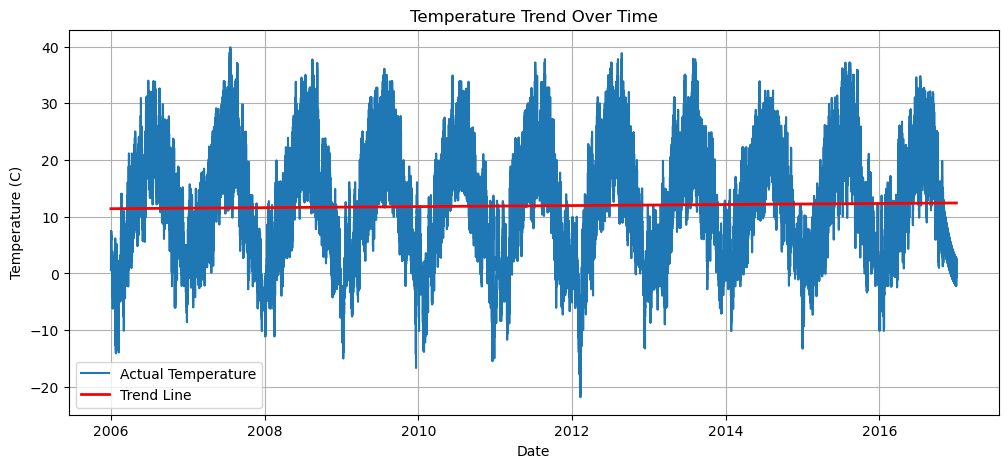

Slope of Trend Line: 1.0501604474073186e-05


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
df=pd.read_csv("weatherHistory.csv")
print(df.columns)
# Convert date column to datetime format
df["Formatted Date"] = pd.to_datetime(df["Formatted Date"])
# Sort by date (important for time-series)
df = df.sort_values("Formatted Date")
# 2. CREATE TIME VARIABLE (1, 2, 3, ...)
df["Time"] = np.arange(1, len(df) + 1)
# 3. SELECT FEATURE (Time) AND TARGET (Temperature)
X = df["Time"].values.reshape(-1, 1)
y = df["Temperature (C)"].values
# 4. FIT LINEAR REGRESSION MODEL
model = LinearRegression()
model.fit(X, y)
# Predict trend line
trend_line = model.predict(X)
# 5. PLOT REAL DATA VS TREND LINE
plt.figure(figsize=(12,5))
plt.plot(df["Formatted Date"], y, label="Actual Temperature")
plt.plot(df["Formatted Date"], trend_line, color="red", linewidth=2, label="Trend Line")
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.title("Temperature Trend Over Time")
plt.legend()
plt.grid(True)
plt.show()
# 6. PRINT SLOPE FOR INTERPRETATION
print("Slope of Trend Line:", model.coef_[0])


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 20 Nov 2025   Prob (F-statistic):          2.04e-139
Time:                        00:53:27   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|     

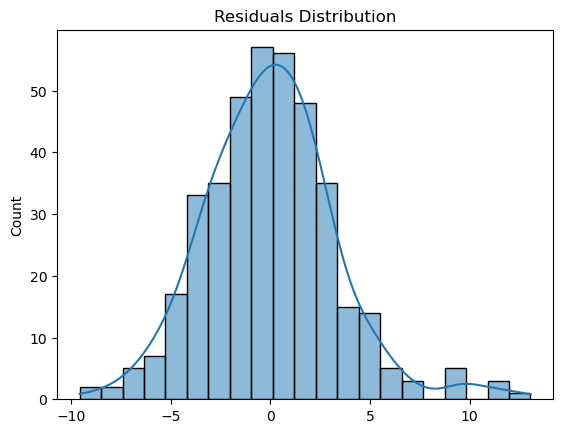

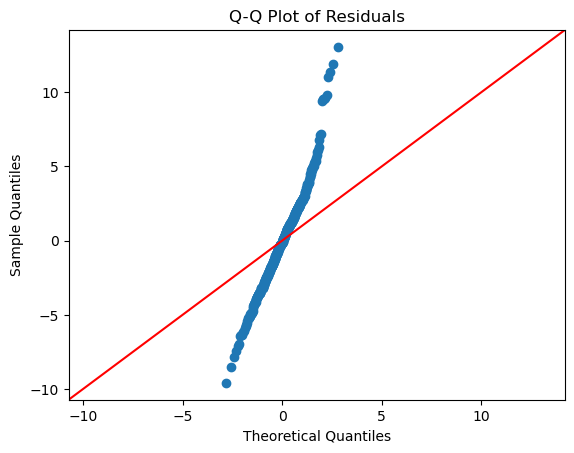

Shapiro-Wilk test: statistic=0.9765923496184999, p-value=5.768358918627448e-06


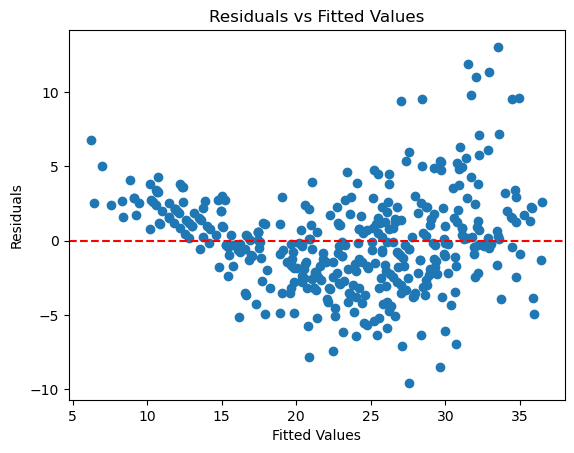

        feature         VIF
0     cylinders  117.708547
1  displacement   96.909762
2    horsepower   67.072154
3        weight  139.454162
4  acceleration   69.699769
5    model year  115.794614
6        origin    8.469942


In [12]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

# Load data
df = pd.read_csv("auto.csv")
print(df.columns)
# Convert horsepower to numeric and drop NaNs
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df = df.dropna(subset=['horsepower'])

# Features and target
# Correct column names with space
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
y = df['mpg']

# Add constant
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

print(model.summary())


# Add constant
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()
print(model.summary())

# Residuals
residuals = model.resid

# Normality checks
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

shapiro_test = stats.shapiro(residuals)
print(f'Shapiro-Wilk test: statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

# Homoscedasticity check
fitted_vals = model.fittedvalues
plt.scatter(fitted_vals, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Multicollinearity (VIF)
X_no_const = X.drop(columns=['const'])
vif = pd.DataFrame()
vif['feature'] = X_no_const.columns
vif['VIF'] = [variance_inflation_factor(X_no_const.values, i) for i in range(X_no_const.shape[1])]
print(vif)
